# Rodar algortimos de Machine Learning

In [1]:
# Libs
import pandas as pd

# Importa Classes de objetos
from analise_qualidade_vinhos.etl.extract import extract_csv_processed, extract_model
from analise_qualidade_vinhos.models.pipelines.pipeline_classification import pipeline_classification
from analise_qualidade_vinhos.models.pipelines.pipeline_regression import pipeline_regression
from analise_qualidade_vinhos.models.evaluation.cross_validation import avaliar_cross_validation, avaliar_modelo, executar_random_search
from analise_qualidade_vinhos.models.classification.param_distributions import get_classification_param_distributions
from analise_qualidade_vinhos.visualization.plot_roc import plot_roc_curve

#### Extrair dados para o uso do modelo

In [2]:
input_path = 'modelo_ml.csv'

df = extract_csv_processed(input_path)
df_reg = df.copy()
df

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,ph,sulfitos,alcool,qualidade
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4081,7.460685,0.358786,0.319419,2.018466,0.074485,16.757260,25.577810,0.994567,3.253351,0.719419,11.569918,8
4082,8.243256,0.365820,0.393055,2.040515,0.059241,13.176834,29.000000,0.995526,3.168215,0.772154,10.996139,8
4083,7.729226,0.478521,0.326338,2.260916,0.075317,11.073933,19.390837,0.992978,3.213662,0.713169,12.519368,8
4084,8.128720,0.523680,0.157238,2.240233,0.067690,35.195346,49.333130,0.994221,3.388279,0.723564,12.565524,8


#### Prepação para uso do pipeline de classificação e regressão

In [3]:
bins =[2.5, 5.5, 6.5, 8.5]
labels = [0, 1, 2]

bins_1 = [2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]
labels_1 = [0, 1, 2, 3, 4, 5]

In [4]:
# catagorizando as coluna qualidade para 3 categoria 0 = Qualidade Baixa, 1 = Qualidade média, 2 = Qualidade Alta
df['target'] = pd.cut(
    df['qualidade'],
    bins=bins_1,
    labels= labels_1,
    include_lowest=True,
    right=True
)
df.drop('qualidade', axis=1, inplace=True)
df

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,ph,sulfitos,alcool,target
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,2
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,2
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,2
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,3
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4081,7.460685,0.358786,0.319419,2.018466,0.074485,16.757260,25.577810,0.994567,3.253351,0.719419,11.569918,5
4082,8.243256,0.365820,0.393055,2.040515,0.059241,13.176834,29.000000,0.995526,3.168215,0.772154,10.996139,5
4083,7.729226,0.478521,0.326338,2.260916,0.075317,11.073933,19.390837,0.992978,3.213662,0.713169,12.519368,5
4084,8.128720,0.523680,0.157238,2.240233,0.067690,35.195346,49.333130,0.994221,3.388279,0.723564,12.565524,5


### **Modelo de Classificação**

In [6]:
# Base Line de Classificação
results_tree = pipeline_classification(
    data_path = df,
    target_column = 'target',
    model_name = 'tree_classifier',
    custom_params =None,
    scale_type='standard',
    test_size=0.3,
    return_data=True,
    avarage='weighted',
    save=True
)

Iniciando pipeline de classificação com modelo: tree_classifier
Modelo tree_classifier criado com sucesso!
Iniciando predição do pipeline de classificação com modelo: tree_classifier

Métricas:
  Accuracy: 0.7781
  Precision: 0.7728
  Recall: 0.7781
  F1-score: 0.7744
  Confusion Matrix:
    [196, 1, 3, 0, 0, 0]
    [4, 169, 16, 7, 1, 0]
    [3, 23, 135, 43, 14, 0]
    [9, 17, 44, 119, 28, 3]
    [1, 4, 7, 23, 146, 7]
    [0, 0, 0, 2, 12, 189]
Salvando arquivo treinado de classificação do modelo: tree_classifier
✅ Modelo salvo em: ../models_storage\tree_classifier_model.pkl
✅ Modelo salvo em: ../models_storage\tree_classifier_scaler.pkl


##### O nosso modelo base a ***arvore de classificação*** já nos retornou um valor muito satisfatório com mostrado acima, rodarei outros modelos a partir de base e farei validações para garamtirmos que não nosso dados não estão tendo overfitting, prejudicando assim nossas predições dos dados.

In [8]:
# Logistic Regression
results_lr = pipeline_classification(
    data_path = df,
    target_column = 'target',
    model_name = 'logistic_regression',
    custom_params =None,
    scale_type='minmax',
    test_size=0.3,
    return_data=True,
    avarage='weighted',
    save=None
)

Iniciando pipeline de classificação com modelo: logistic_regression
Modelo logistic_regression criado com sucesso!

Métricas:
  Accuracy: 0.5832
  Precision: 0.5637
  Recall: 0.5832
  F1-score: 0.5604
  Confusion Matrix:
    [184, 16, 0, 0, 0, 0]
    [54, 83, 34, 19, 4, 3]
    [24, 47, 113, 16, 10, 8]
    [16, 36, 46, 55, 42, 25]
    [1, 9, 6, 23, 99, 50]
    [0, 0, 0, 0, 22, 181]


h:\Portifolios_e_anotacoes_Jackson\PORTIFÓLIOS\analise-qualidade-vinhos\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


##### Regressão Logistica teve um performance menor que nosso modelo base

In [13]:
results_xgb = pipeline_classification(
    data_path = df,
    target_column = 'target',
    model_name = 'xgboost',
    custom_params =None,
    scale_type='minmax',
    test_size=0.3,
    return_data=True,
    avarage='weighted',
    save=True
)

Iniciando pipeline de classificação com modelo: xgboost
Modelo xgboost criado com sucesso!
Iniciando predição do pipeline de classificação com modelo: xgboost

Métricas:
  Accuracy: 0.8385
  Precision: 0.8330
  Recall: 0.8385
  F1-score: 0.8312
  Confusion Matrix:
    [199, 0, 1, 0, 0, 0]
    [1, 184, 8, 4, 0, 0]
    [5, 13, 161, 31, 8, 0]
    [1, 10, 57, 111, 36, 5]
    [0, 1, 4, 7, 171, 5]
    [0, 0, 0, 0, 1, 202]
Salvando arquivo treinado de classificação do modelo: xgboost
✅ Modelo salvo em: ../models_storage\xgboost_model.pkl
✅ Modelo salvo em: ../models_storage\xgboost_scaler.pkl


In [5]:
# Lightgbm
results_lgm = pipeline_classification(
    data_path = df,
    target_column = 'target',
    model_name = 'lightgbm',
    custom_params =None,
    scale_type='minmax',
    test_size=0.2,
    return_data=True,
    avarage='weighted',
    save=True
)

Iniciando pipeline de classificação com modelo: lightgbm
Modelo lightgbm criado com sucesso!
Iniciando predição do pipeline de classificação com modelo: lightgbm

Métricas:
  Accuracy: 0.8704
  Precision: 0.8672
  Recall: 0.8704
  F1-score: 0.8675
  Confusion Matrix:
    [132, 0, 0, 0, 0, 0]
    [0, 127, 3, 1, 0, 0]
    [4, 6, 115, 22, 3, 0]
    [0, 7, 35, 100, 11, 2]
    [0, 0, 2, 8, 106, 0]
    [0, 0, 0, 0, 2, 132]
Salvando arquivo treinado de classificação do modelo: lightgbm
✅ Modelo salvo em: ../models_storage\lightgbm_model.pkl
✅ Modelo salvo em: ../models_storage\lightgbm_scaler.pkl


h:\Portifolios_e_anotacoes_Jackson\PORTIFÓLIOS\analise-qualidade-vinhos\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
h:\Portifolios_e_anotacoes_Jackson\PORTIFÓLIOS\analise-qualidade-vinhos\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [7]:
# Random Forest
results_rf = pipeline_classification(
    data_path = df,
    target_column = 'target',
    model_name = 'random_forest',
    custom_params =None,
    scale_type='minmax',
    test_size=0.3,
    return_data=True,
    avarage='weighted',
    save=True
)

Iniciando pipeline de classificação com modelo: random_forest
Modelo random_forest criado com sucesso!
Iniciando predição do pipeline de classificação com modelo: random_forest

Métricas:
  Accuracy: 0.8491
  Precision: 0.8444
  Recall: 0.8491
  F1-score: 0.8410
  Confusion Matrix:
    [200, 0, 0, 0, 0, 0]
    [1, 186, 7, 3, 0, 0]
    [5, 16, 164, 27, 6, 0]
    [2, 12, 56, 112, 34, 4]
    [0, 0, 2, 5, 177, 4]
    [0, 0, 0, 0, 1, 202]
Salvando arquivo treinado de classificação do modelo: random_forest
✅ Modelo salvo em: ../models_storage\random_forest_model.pkl
✅ Modelo salvo em: ../models_storage\random_forest_scaler.pkl


In [12]:
# catboost
results_cat = pipeline_classification(
    data_path = df,
    target_column = 'target',
    model_name = 'catboost',
    custom_params =None,
    scale_type='standard',
    test_size=0.3,
    return_data=True,
    avarage='weighted',
    save=None
)

Iniciando pipeline de classificação com modelo: catboost
Modelo catboost criado com sucesso!

Métricas:
  Accuracy: 0.7765
  Precision: 0.7617
  Recall: 0.7765
  F1-score: 0.7622
  Confusion Matrix:
    [200, 0, 0, 0, 0, 0]
    [8, 175, 9, 3, 2, 0]
    [7, 30, 142, 30, 9, 0]
    [4, 18, 62, 82, 47, 7]
    [0, 3, 1, 19, 152, 13]
    [0, 0, 0, 0, 2, 201]


In [13]:
# SVM
results_svc = pipeline_classification(
    data_path = df,
    target_column = 'target',
    model_name = 'svm_classifier',
    custom_params =None,
    scale_type='minmax',
    test_size=0.2,
    return_data=True,
    avarage='weighted',
    save=None
)

Iniciando pipeline de classificação com modelo: svm_classifier
Modelo svm_classifier criado com sucesso!
[LibSVM]
Métricas:
  Accuracy: 0.7677
  Precision: 0.7556
  Recall: 0.7677
  F1-score: 0.7520
  Confusion Matrix:
    [132, 0, 0, 0, 0, 0]
    [5, 115, 7, 3, 1, 0]
    [8, 20, 96, 18, 8, 0]
    [4, 19, 46, 59, 16, 11]
    [0, 4, 1, 9, 92, 10]
    [0, 0, 0, 0, 0, 134]


## O modelo base que utilizei foi o tree classification com um resultado de 77% a partir dai rodeis outros modelos para buscar o melhor resultado final
## Todos nossos modelos ficaram acima dos 75% de F1-score ótimo resultado para nossas predições, agora irei fazer as validações necessárias para que possamos descartar overfitting.
## O modelo com melhor performance foi o lightgbm com 87% de F1-score então sera com ele que irei fazer as validações.

# Validações do modelo de Classificação

In [49]:
# Desempacotando o resultado do pipeline treinado e testado
model_lgm, X_train, X_test, y_train, y_test =  results_lgm['train_model']

In [76]:
display(X_test)

array([[ 2.51546727,  0.09441649,  0.86314825, ..., -2.22075826,
         0.37299189, -1.21822721],
       [-0.47456512, -0.14146734, -0.70863759, ...,  0.444325  ,
        -0.2976061 , -1.13153973],
       [ 0.34375954, -2.1228915 ,  0.86314825, ...,  0.58099593,
         0.82005721,  1.03564739],
       ...,
       [-0.57167598,  2.09942904, -1.34717559, ...,  1.88125886,
        -1.05769162,  0.03503851],
       [-0.51649821,  0.35005558, -0.79862801, ...,  0.23926603,
        -1.15449564, -1.33375497],
       [-0.60046122, -0.1886441 , -0.0700996 , ..., -1.19572624,
        -0.59564966, -1.13153973]], shape=(818, 11))

In [50]:
# Pega disctribuição dinâmica de parâmetros
model_name = 'lightgbm'
param_grid_rfc = get_classification_param_distributions(model_name)

In [51]:
# Roda RandomSearch fazendo a validação cruzada
busca = executar_random_search(model_lgm, param_grid_rfc, X_train, y_train, cv=10)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


h:\Portifolios_e_anotacoes_Jackson\PORTIFÓLIOS\analise-qualidade-vinhos\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "h:\Portifolios_e_anotacoes_Jackson\PORTIFÓLIOS\analise-qualidade-vinhos\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "h:\Portifolios_e_anotacoes_Jackson\PORTIFÓLIOS\analise-qualidade-vinhos\.venv\Lib\site-packages\lightgbm\sklearn.py", line 1560, in fit
    super().fit(
  File "h:\Portifolios_e_anotacoes_Jackson


Validação Cruzada (f1_weighted):
Scores por fold: [0.84973755 0.86090039 0.84432044 0.84907613 0.87843239]
Média: 0.8565
Desvio Padrão: 0.0122
Melhor: 0.8784
Pior: 0.8443


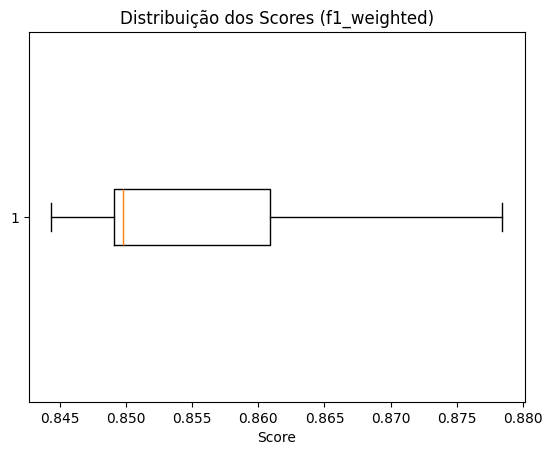

In [47]:
# Roda o RandomSearch após efetuar a validação cruzada
avaliar_cross_validation(busca, X_train, y_train, cv=5)

### 1º teste foi a validação cruzada com randomsearch que faz testes com blocos separados mantendo uma generização nos dados, e obtivemos um resultado satisfatório com um média dos Scores por fold de 0.85 e desvio padrão baixo de 0.0122.

h:\Portifolios_e_anotacoes_Jackson\PORTIFÓLIOS\analise-qualidade-vinhos\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Melhores parâmetros: {'learning_rate': np.float64(0.3009729556485983), 'max_depth': 10, 'n_estimators': 207, 'num_leaves': 57, 'subsample': np.float64(0.5007787658410143)}
Acurácia: 0.8691931540342298
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       132
           1       0.90      0.99      0.95       131
           2       0.74      0.74      0.74       150
           3       0.76      0.62      0.68       155
           4       0.87      0.95      0.91       116
           5       0.99      0.99      0.99       134

    accuracy                           0.87       818
   macro avg       0.87      0.88      0.87       818
weighted avg       0.86      0.87      0.86       818



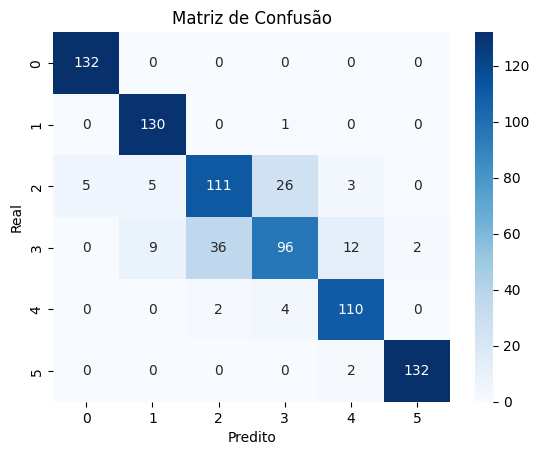

In [48]:
# Avalia o teste com a validação cruzada
avaliar_modelo(busca, X_test, y_test)

### Obtemos uma ótima acuracia de 0.955, utilizando os dados cruzados com randosearch

h:\Portifolios_e_anotacoes_Jackson\PORTIFÓLIOS\analise-qualidade-vinhos\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Melhores parâmetros: não aplicável (modelo não passou por busca de hiperparâmetros)
Acurácia: 0.871638141809291
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       132
           1       0.92      0.97      0.94       131
           2       0.74      0.75      0.75       150
           3       0.76      0.63      0.69       155
           4       0.87      0.95      0.91       116
           5       0.99      0.99      0.99       134

    accuracy                           0.87       818
   macro avg       0.87      0.88      0.88       818
weighted avg       0.87      0.87      0.87       818



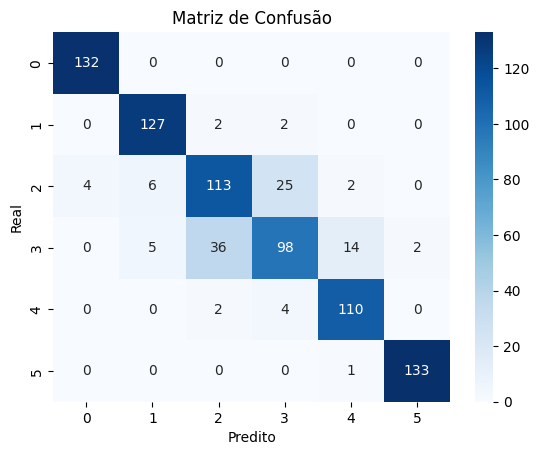

In [52]:
# Avalia o teste com a validação
avaliar_modelo(model_lgm, X_test, y_test)

### Obtemos a mesma acuracia de 0.955, utilizando o modelo sem cruzar os dados

In [53]:
train_score = model_lgm.score(X_train, y_train)
test_score = model_lgm.score(X_test, y_test)
print(f'Treino: {train_score:.4f} | Teste: {test_score:.4f}')

Treino: 1.0000 | Teste: 0.8716


h:\Portifolios_e_anotacoes_Jackson\PORTIFÓLIOS\analise-qualidade-vinhos\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
h:\Portifolios_e_anotacoes_Jackson\PORTIFÓLIOS\analise-qualidade-vinhos\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


### Mesmo o treino dando overfitting com 1.0 o Teste nos mostra que nosso modelo está generalizando os dados, isso é ótimo e nos ajuda com mais confirmação que ele não irá overfitar com dados novos.

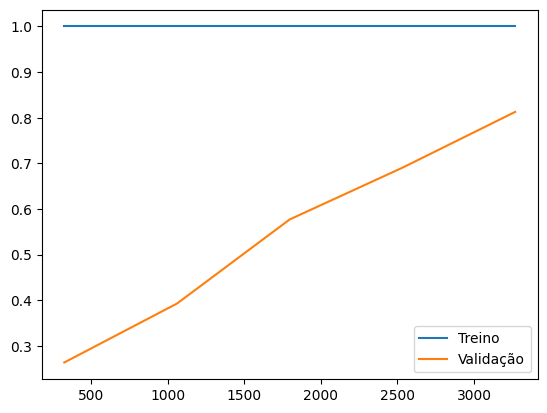

In [54]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

X = df.drop(columns=['target'])
y = df['target']
train_sizes, train_scores, test_scores = learning_curve(model_lgm, X, y, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Treino')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validação')
plt.legend()
plt.show()


### Do mesmo jeito que o teste de cima, a curva de aprendizado nos mostra que nossa validação está próxima ao treino com 0.87 isso é mais uma confirmação de não overfitting de nossos dados. 

In [55]:
df

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,ph,sulfitos,alcool,target
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,2
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,2
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,2
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,3
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4081,7.460685,0.358786,0.319419,2.018466,0.074485,16.757260,25.577810,0.994567,3.253351,0.719419,11.569918,5
4082,8.243256,0.365820,0.393055,2.040515,0.059241,13.176834,29.000000,0.995526,3.168215,0.772154,10.996139,5
4083,7.729226,0.478521,0.326338,2.260916,0.075317,11.073933,19.390837,0.992978,3.213662,0.713169,12.519368,5
4084,8.128720,0.523680,0.157238,2.240233,0.067690,35.195346,49.333130,0.994221,3.388279,0.723564,12.565524,5


In [92]:
colunas = ['acidez_fixa', 'acidez_volatil', 'acido_citrico', 'acucar_residual',
       'cloretos', 'dioxido_enxofre_livre', 'dioxido_enxofre_total',
       'densidade', 'ph', 'sulfitos', 'alcool', 'target']

### **Modelo de Regressão**

In [ ]:
# Base Line de regressão
results_lrr = pipeline_regression(
    data_path=df_reg,
    target_column='qualidade',
    model_name='linear_regression',
    custom_params=None,
    scale_type='standard',
    test_size=0.2,
    return_data=True,
    save=None
)

Iniciando pipeline de regressão com modelo: linear_regression
Modelo linear_regression criado com sucesso!
Métricas:
  MAE: 0.6247
  MSE: 0.6506
  R2: 0.8333
  RMSE: 0.8066
  MAPE: 13.1927
✅ Modelo salvo em: ../models_storage\linear_regression_model.pkl
✅ Modelo salvo em: ../models_storage\linear_regression_scaler.pkl


In [ ]:
# Random Forest
results_rfr = pipeline_regression(
    data_path=df_reg,
    target_column='qualidade',
    model_name='random_forest',
    custom_params=None,
    scale_type='standard',
    test_size=0.2,
    return_data=True,
    save=None
)

Iniciando pipeline de regressão com modelo: random_forest
Modelo random_forest criado com sucesso!
Métricas:
  MAE: 0.1359
  MSE: 0.1095
  R2: 0.9719
  RMSE: 0.3309
  MAPE: 2.7775
✅ Modelo salvo em: ../models_storage\random_forest_model.pkl
✅ Modelo salvo em: ../models_storage\random_forest_scaler.pkl


In [ ]:
# XGBoost
results_xgbr = pipeline_regression(
    data_path=df_reg,
    target_column='qualidade',
    model_name='xgboost',
    custom_params=None,
    scale_type='standard',
    test_size=0.2,
    return_data=True,
    save=None
)

Iniciando pipeline de regressão com modelo: xgboost
Modelo xgboost criado com sucesso!
Métricas:
  MAE: 0.1442
  MSE: 0.1038
  R2: 0.9734
  RMSE: 0.3222
  MAPE: 2.9829
✅ Modelo salvo em: ../models_storage\xgboost_model.pkl
✅ Modelo salvo em: ../models_storage\xgboost_scaler.pkl


In [ ]:
# Lightgbm
results_lgmr = pipeline_regression(
    data_path=df_reg,
    target_column='qualidade',
    model_name='lightgbm',
    custom_params=None,
    scale_type='standard',
    test_size=0.2,
    return_data=True,
    save=None
)

Iniciando pipeline de regressão com modelo: lightgbm
Modelo lightgbm criado com sucesso!
Métricas:
  MAE: 0.1449
  MSE: 0.0862
  R2: 0.9779
  RMSE: 0.2936
  MAPE: 3.0663
✅ Modelo salvo em: ../models_storage\lightgbm_model.pkl
✅ Modelo salvo em: ../models_storage\lightgbm_scaler.pkl


h:\Portifolios_e_anotacoes_Jackson\PORTIFÓLIOS\analise-qualidade-vinhos\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# catboost
results_catr = pipeline_regression(
    data_path=df_reg,
    target_column='qualidade',
    model_name='catboost',
    custom_params=None,
    scale_type='standard',
    test_size=0.2,
    return_data=True,
    save=None
)

Iniciando pipeline de regressão com modelo: catboost
Modelo catboost criado com sucesso!
Métricas:
  MAE: 0.2369
  MSE: 0.1413
  R2: 0.9638
  RMSE: 0.3759
  MAPE: 4.9098
✅ Modelo salvo em: ../models_storage\catboost_model.pkl
✅ Modelo salvo em: ../models_storage\catboost_scaler.pkl


In [ ]:
# gradient_boosting
results_gbgr = pipeline_regression(
    data_path=df_reg,
    target_column='qualidade',
    model_name='gradient_boosting',
    custom_params=None,
    scale_type='standard',
    test_size=0.2,
    return_data=True,
    save=None
)

Iniciando pipeline de regressão com modelo: gradient_boosting
Modelo gradient_boosting criado com sucesso!
Métricas:
  MAE: 0.3069
  MSE: 0.2202
  R2: 0.9436
  RMSE: 0.4693
  MAPE: 6.3854
✅ Modelo salvo em: ../models_storage\gradient_boosting_model.pkl
✅ Modelo salvo em: ../models_storage\gradient_boosting_scaler.pkl


In [ ]:
# extra_trees
results_etr = pipeline_regression(
    data_path=df_reg,
    target_column='qualidade',
    model_name='extra_trees',
    custom_params=None,
    scale_type='standard',
    test_size=0.2,
    return_data=True,
    save=None
)

Iniciando pipeline de regressão com modelo: extra_trees
Modelo extra_trees criado com sucesso!
Métricas:
  MAE: 0.0823
  MSE: 0.0556
  R2: 0.9857
  RMSE: 0.2359
  MAPE: 1.6377
✅ Modelo salvo em: ../models_storage\extra_trees_model.pkl
✅ Modelo salvo em: ../models_storage\extra_trees_scaler.pkl
